In [9]:
get_ipython().run_line_magic('matplotlib', 'inline')
import xml.etree.ElementTree
import matplotlib.pyplot as plt
from collections import OrderedDict

In [11]:
# Parse clz backup

e = xml.etree.ElementTree.parse('backup.xml').getroot()
data = list(e)[2]

comics = []
for comic in list(data):
    main = comic.find('mainsection')
    t = main.find('title')
    comics.append({'title': t.text if t is not None else None, 
                   'series': {'data': main.find('series'), 'title': main.find('series').find('displayname').text if main.find('series').find('displayname') is not None else None},
        'data': main, 'issue': {'num': comic.find('issuenr'), 'ext': comic.find('issuenr')}, 'lang': comic.find('language').find('displayname').text,
                  'publisher': comic.find('publisher').find('displayname').text})
comics = sorted(comics, key=lambda x: int(x['issue']['num'].text) if x['issue']['num'] is not None else 0)
comics = sorted(comics, key=lambda x: x['series']['title'] if x['series']['title'] is not None else x['title'])

print()
print("Books total: {}".format(len(comics)))


Books total: 162


In [12]:
# Dump all books

for comic in comics:
    n = comic['issue']['num']
    num = ''
    if n is not None:
        num = n.text
    e = comic['issue']['ext']
    ext = ''
    if e is not None and num != e.text:
        ext = e.text
    title = "{}: {}".format(comic['series']['title'], comic['title'])
    if comic['title'] is None:
        title = comic['series']['title']
    if comic['series']['title'] is None or (comic['title'] is not None and comic['title'].startswith("{}: ".format(comic['series']['title']))):
        title = comic['title']
    issue = ""
    if num != '' or ext != '':
        issue = "[{}{}]".format(num, ext)
    print("{} {} -- {}".format(title, issue, comic['lang']))


Alias Omnibus [1] -- English
American Vampire [1] -- Russian
American Vampire [2] -- Russian
American Vampire [3] -- Russian
American Vampire [4] -- Russian
Archie, Vol. 2 HC / TP [1] -- Russian
Archie, Vol. 2 HC / TP [2] -- Russian
Archie, Vol. 2 HC / TP [3] -- Russian
Batman: The Killing Joke  -- English
Batman: Mad Love  -- Russian
Batman: The Black Mirror  -- English
Batman: Hush  -- English
Batman: Year One  -- English
Batman: The Long Halloween  -- English
Batman: Arkham Asylum  -- English
Batman: R.I.P.  -- English
Batman: The Black Glove  -- English
Batman: Batman And Son  -- English
Batman: The Resurrection of Ra's Al Ghul  -- English
Batman: Noel  -- Russian
Batman: The Man Who Laughs  -- Russian
Batman: The Button  -- English
Batman: Under The Red Hood  -- English
Batman: Joker  -- Russian
Batman: The Court Of Owls [1] -- English
Batman: Knightfall Omnibus [1] -- English
Batman: Harley Quinn [1] -- English
Batman: The City Of Owls [2] -- English
Batman: Death Of The Family [

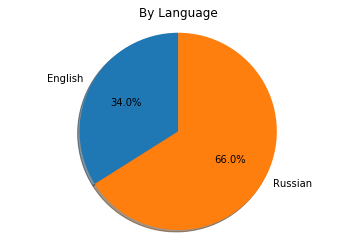

In [16]:
# Pie chart by language

langs = {}
for comic in comics:
    if comic['lang'] in langs:
        langs[comic['lang']] += 1
    else:
        langs[comic['lang']] = 1

labels = tuple(k for k in langs)
sizes = [langs[k]/len(comics)*100 for k in langs]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('By Language')

plt.show()

OrderedDict([('Batman', 41), ('Other', 26), ('Transmetropolitan', 10), ('Daredevil by Mark Waid', 7), ('Бесобой', 7), ('Майор Гром TP', 7), ('Superior Spider-Man HC / TP', 6), ('The Sandman [RU]', 6), ('Suicide Squad, Vol. 3 TP', 5), ('American Vampire', 4), ('Hawkeye, Vol. 4 HC / TP', 4), ('Justice League TP / HC', 4), ('Archie, Vol. 2 HC / TP', 3), ('Moon Knight. Vol. 7 HC / TP', 3), ('The Flash: The New 52 HC / TP', 3), ('Darkness Origins', 2), ('Deadpool TP / HC', 2), ('Deadpool by Daniel Way: The Complete Collection', 2), ('Deadpool, Vol. 4 TP / HC', 2), ('Fables HC: The Deluxe Edition', 2), ('Harley Quinn, Vol. 2 HC / TP', 2), ('Iron Man, Vol. 5 HC / TP', 2), ('Rat Queens', 2), ('Sex Criminals', 2), ('Spawn Origins', 2), ('The Punisher, Vol. 7 (2004-2009) TP', 2), ('Vision, Vol. 3 HC / TP', 2), ('Экслибриум', 2)])


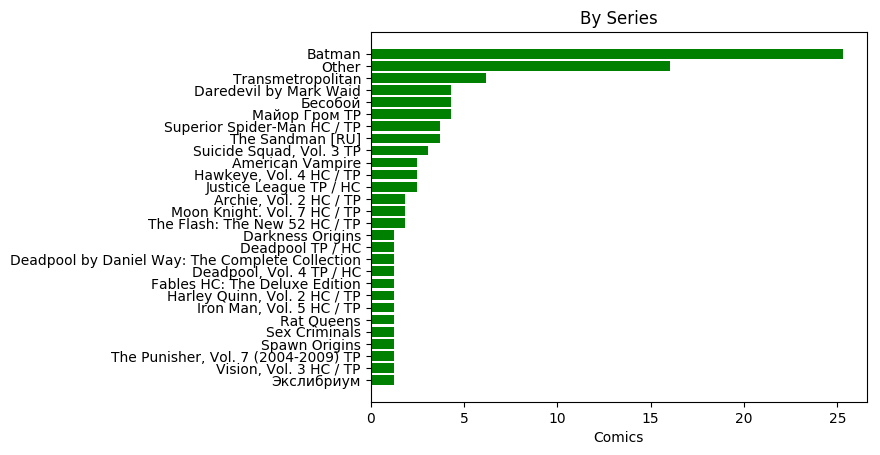

In [7]:
# Books by series

series = {}
for comic in comics:
    st = comic['series']['title']
    if st in series:
        series[st] += 1
    else:
        series[st] = 1

for k in series.copy():
    if ('Batman' in k or 'Dark ' in k) and 'Batman' != k:
        series['Batman'] += series[k]
        del series[k]

series = { k: series[k] for k in series if series[k] > 1 }
series['Other'] = len(comics) - sum(series.values())
series = OrderedDict(sorted(series.items(), key=lambda x: -x[1]))
print(series)

labels = tuple(k for k in series)
sizes = [series[k]/len(comics)*100 for k in series]

import numpy as np
y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(y_pos, sizes, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Comics')
ax.set_title('By Series')

plt.show()

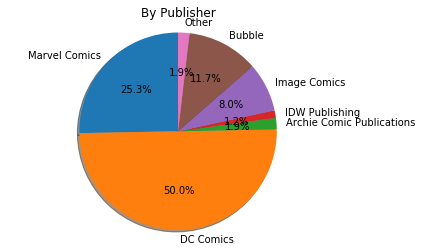

In [17]:
pubs = {}
for comic in comics:
    if comic['publisher'] in pubs:
        pubs[comic['publisher']] += 1
    else:
        pubs[comic['publisher']] = 1
        
pubs = { k: pubs[k] for k in pubs if pubs[k] > 1 }
pubs['Other'] = len(comics) - sum(pubs.values())
pubs['DC Comics'] += pubs['Азбука']
del pubs['Азбука']
labels = tuple(k for k in pubs)
sizes = [pubs[k]/len(comics)*100 for k in pubs]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('By Publisher')

plt.show()